## Importing Important Libraries

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline 

## Importing the Dataset

In [102]:
os.chdir("C:\\Users\\koushik\\OneDrive\\Desktop\\ML Projects\\Car Selling Price Prediction using Random Forest Regression\\Code")

In [103]:
cars = pd.read_csv("Car details.csv")
cars.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,440000
6,Maruti Wagon R LXI DUO BSIII,2007,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,96000
7,Maruti 800 DX BSII,2001,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,45000
8,Toyota Etios VXD,2011,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,350000
9,Ford Figo Diesel Celebration Edition,2013,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,200000


## Data Preprocessing

## Removing NULL Values from the Dataset

In [104]:
cars.shape

(8128, 13)

In [105]:
cars.isnull().sum()

name               0
year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
selling_price      0
dtype: int64

In [106]:
cars = cars.dropna(how = 'any')

cars.shape

(7906, 13)

## Data CLeaning

In [107]:
import re

In [108]:
res = '190Nm@ 2,000rpm'.replace(".", "")
res = res.replace(",", "")
a =  [int(s) for s in re.findall(r'\d+', res)]
a

[190, 2000]

In [109]:
torque_list = cars['torque'].to_list()
# torque_list[:2]
torque_rpm = []
def extractingRPM(x):
  for item in x:
    res = item.replace(".", "")
    res = res.replace(",", "")
    temp = [int(s) for s in re.findall(r'\d+', res)]
    torque_rpm.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [110]:
cars['torque_rpm'] = torque_rpm
cars.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000,2500
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000,2700
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000,2750
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000,4500


In [111]:
mil_list = cars['mileage'].to_list()
# torque_list[:2]
mil_kmpl = []
def extractingmil(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [112]:
cars['mil_kmpl'] = mil_kmpl
cars.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000,2500,21.14
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000,2700,17.70
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000,2750,23.00
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000,4500,16.10


In [113]:
engine_list = cars['engine'].to_list()
# torque_list[:2]
engine_cc = []
def extractingEngine(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_cc.append(max(temp))

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [114]:
cars['engine_cc'] = engine_cc

cars.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000,2500,21.14,1498.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000,2700,17.70,1497.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000,2750,23.00,1396.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000,4500,16.10,1298.0


In [115]:
power_list = cars['max_power'].to_list()
# torque_list[:2]
max_power = []
def extractingPower(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power.append(max(temp))

extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [116]:
cars['max_power_new'] = max_power

cars.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000,4500,16.10,1298.0,88.20


In [117]:
cars_new = cars.drop(['mileage', 'engine', 'max_power', 'torque'], axis = 1)

In [118]:
cars_new.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,selling_price,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,5.0,450000,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,5.0,370000,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,5.0,158000,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,5.0,225000,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,5.0,130000,4500,16.10,1298.0,88.20


In [119]:
selling_price_column = cars_new.pop('selling_price')  # Taking the Target Variable at last position
cars_new['selling_price'] = selling_price_column  

In [120]:
cars_new.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52,370000


## Statistical Analysis and Visualization

In [121]:
cars_new.describe()

,year,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,selling_price
count,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7.906000e+03
mean,2013.983936,6.918866e+04,5.416393,3474.631419,19.419861,1458.708829,91.587374,6.498137e+05
std,3.863695,5.679230e+04,0.959208,2579.612132,4.036263,503.893057,35.747216,8.135827e+05
min,1994.000000,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000,2.999900e+04
25%,2012.000000,3.500000e+04,5.000000,2500.000000,16.780000,1197.000000,68.050000,2.700000e+05
50%,2015.000000,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000,4.500000e+05
75%,2017.000000,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000,6.900000e+05
max,2020.000000,2.360457e+06,14.000000,43639.000000,42.000000,3604.000000,400.000000,1.000000e+07


In [122]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   seats          7906 non-null   float64
 8   torque_rpm     7906 non-null   int64  
 9   mil_kmpl       7906 non-null   float64
 10  engine_cc      7906 non-null   float64
 11  max_power_new  7906 non-null   float64
 12  selling_price  7906 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 864.7+ KB


In [123]:
# The ranges for all the columns are all over the place so we might have to normalize some columns or standardize 
# the dataset.

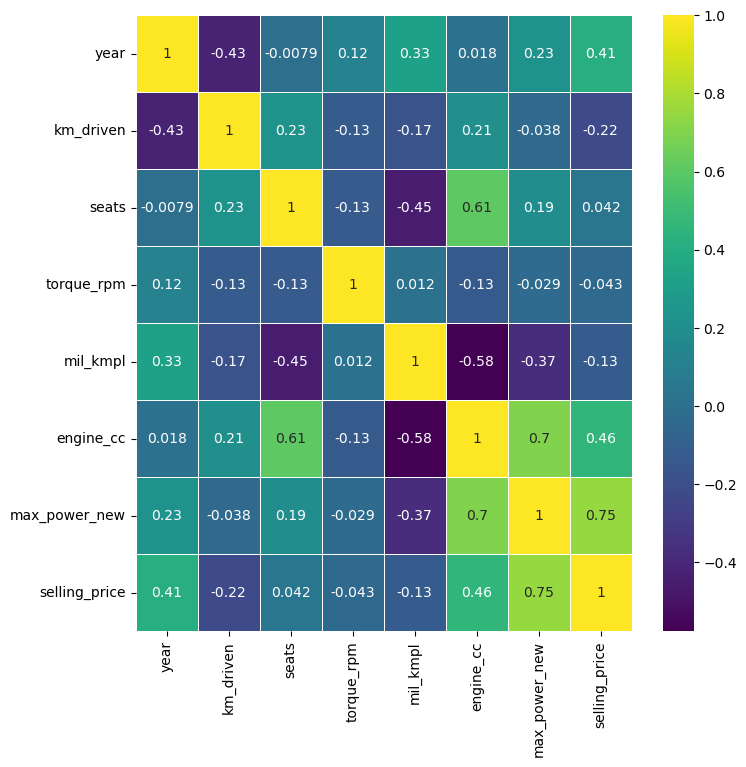

In [124]:
# Assuming 'cars_new' contains both numeric and non-numeric columns
numeric_columns = cars_new.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns

plt.figure(figsize=(8, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.show()

C:\Users\koushik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\koushik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\koushik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\koushik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Figure size 1500x1500 with 0 Axes>

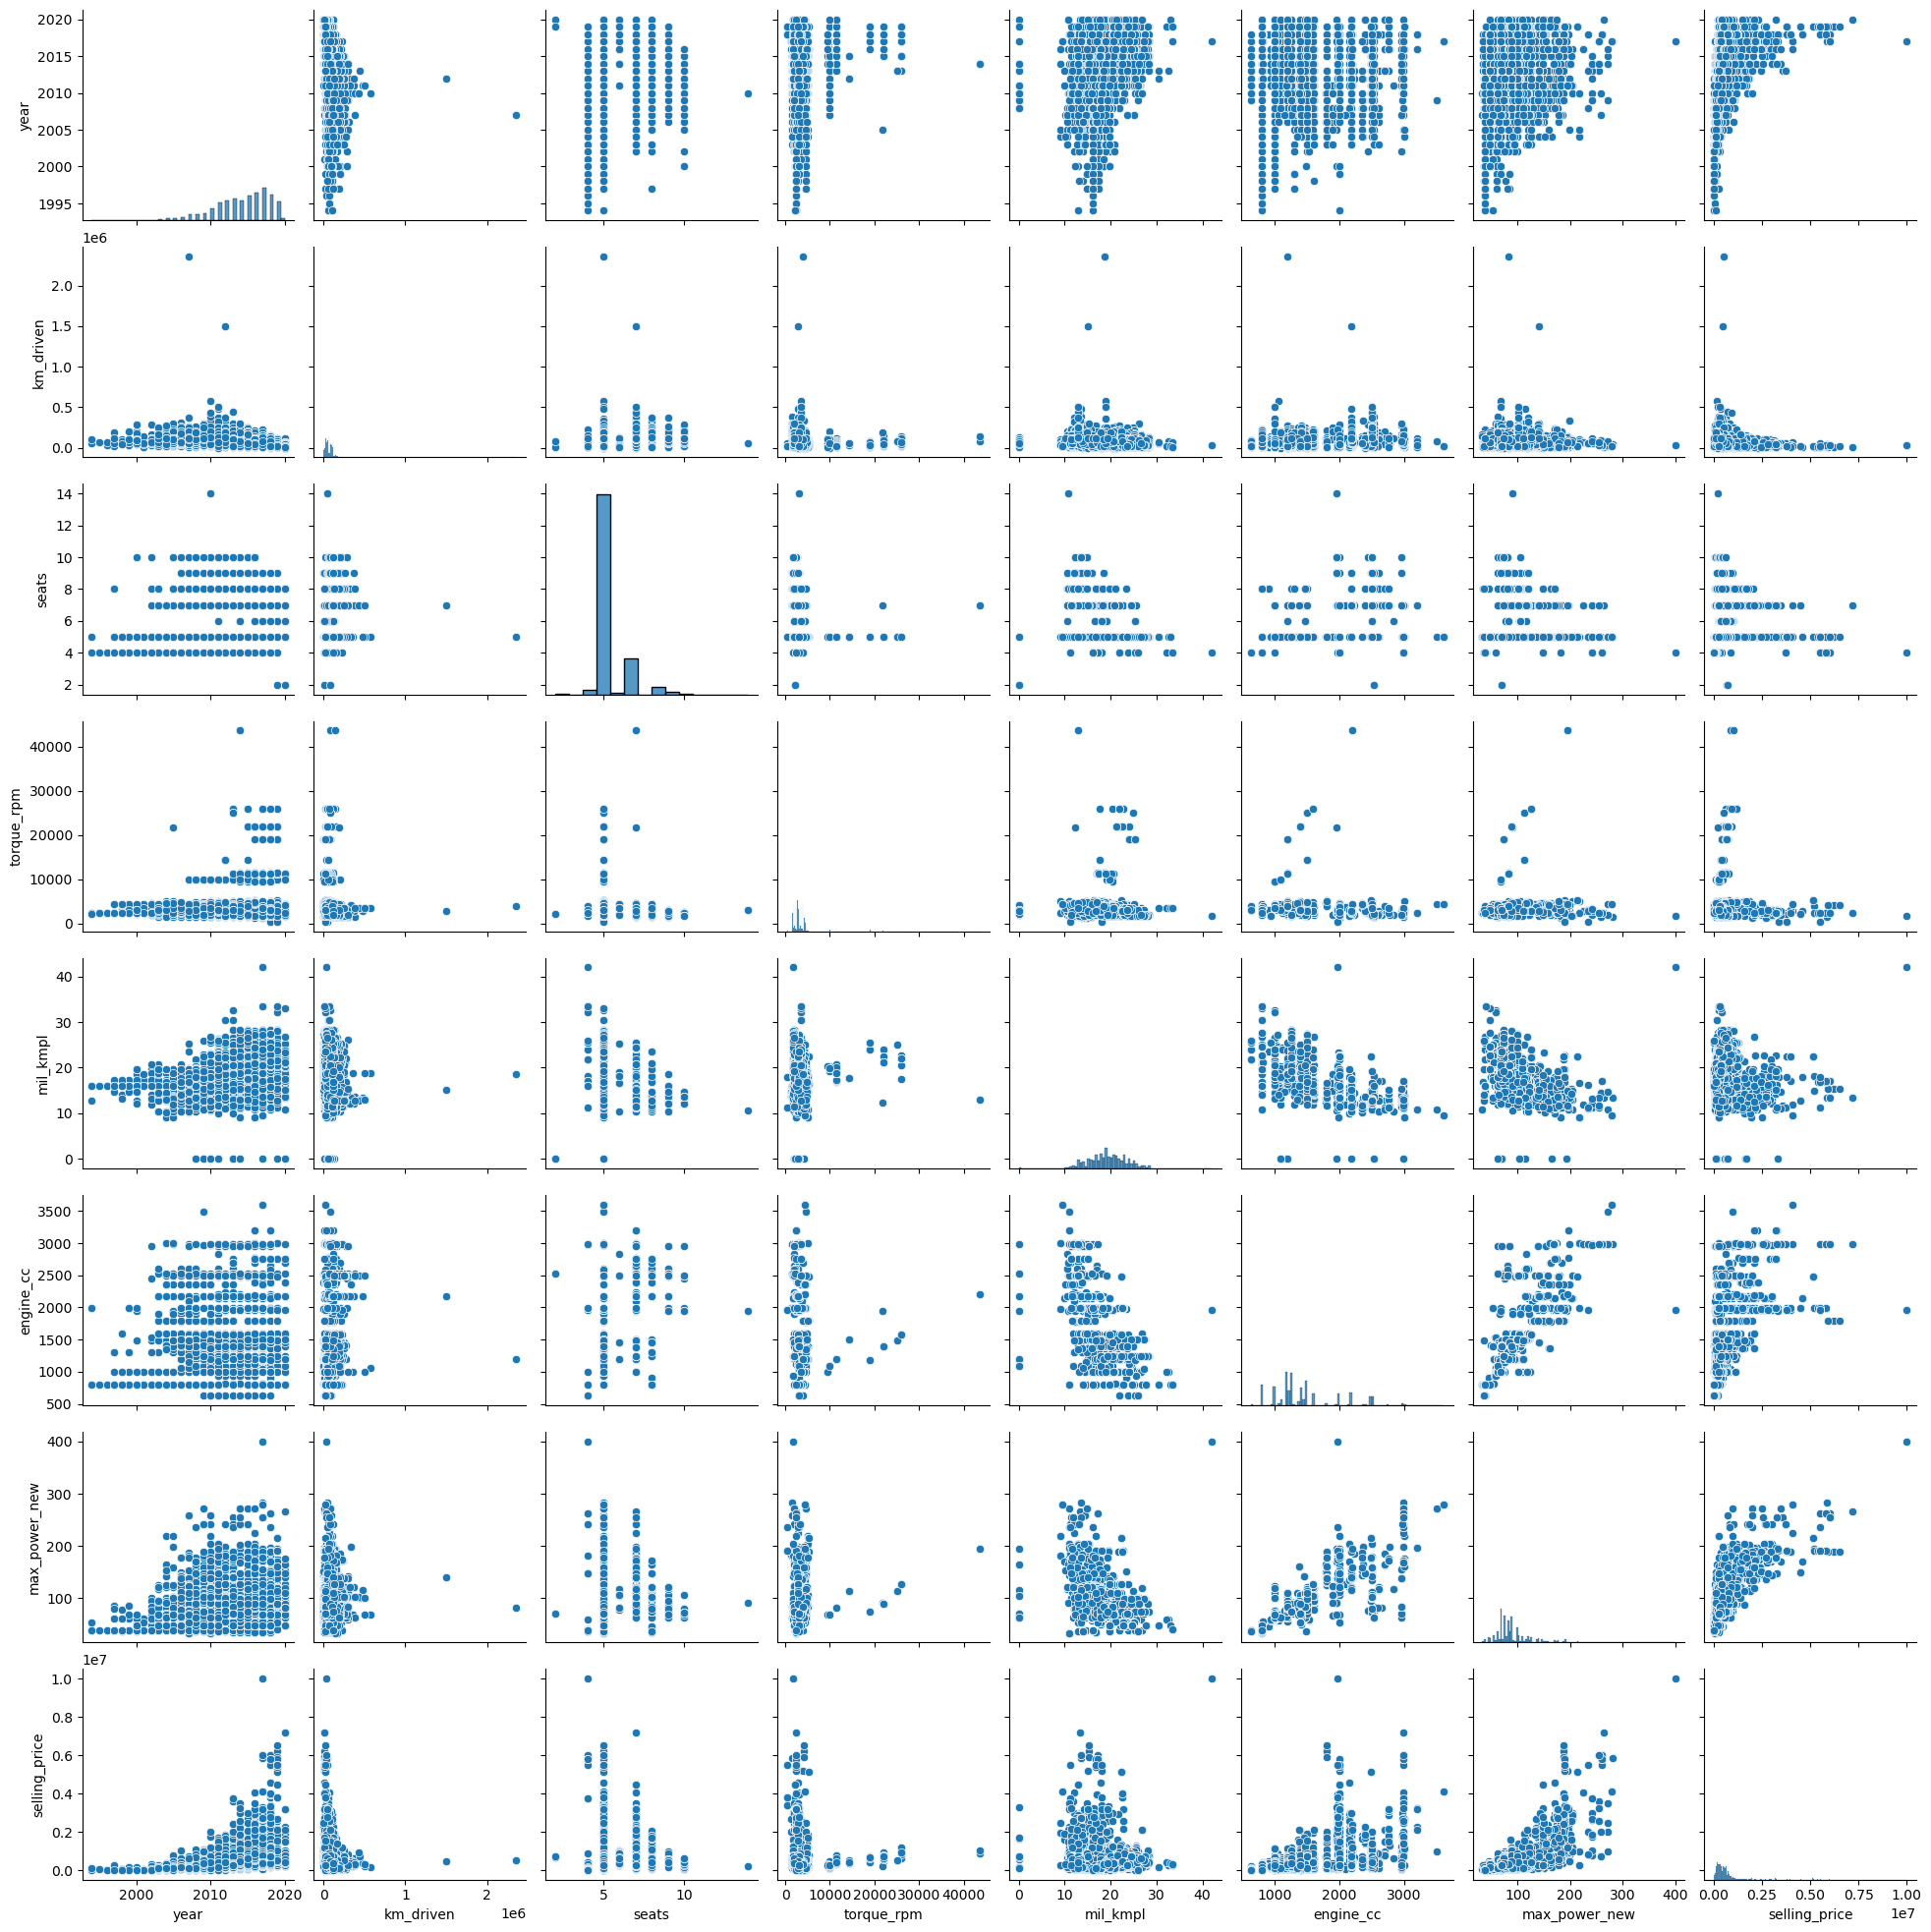

In [125]:
fig=plt.figure(figsize=(15,15))
sns.pairplot(cars_new)
plt.show()

C:\Users\koushik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\koushik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


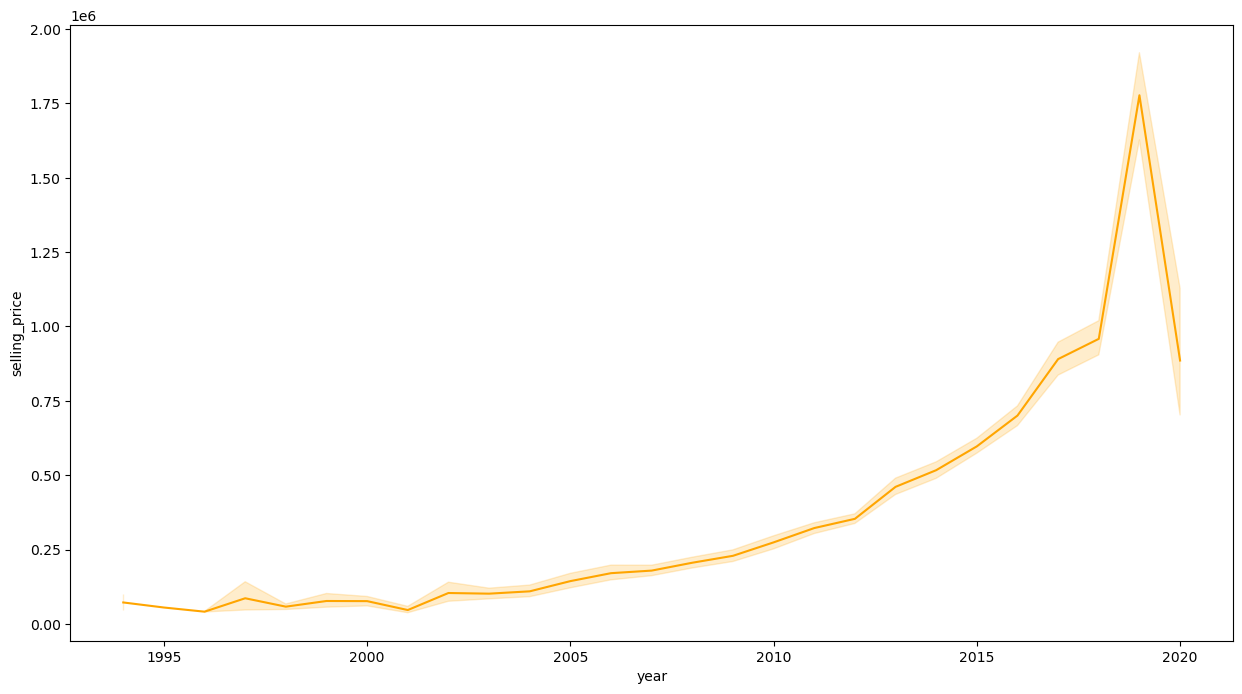

In [126]:
fig=plt.figure(figsize=(15,8))
sns.lineplot(data = cars_new , x = "year" , y ='selling_price', color = 'orange')
plt.show()

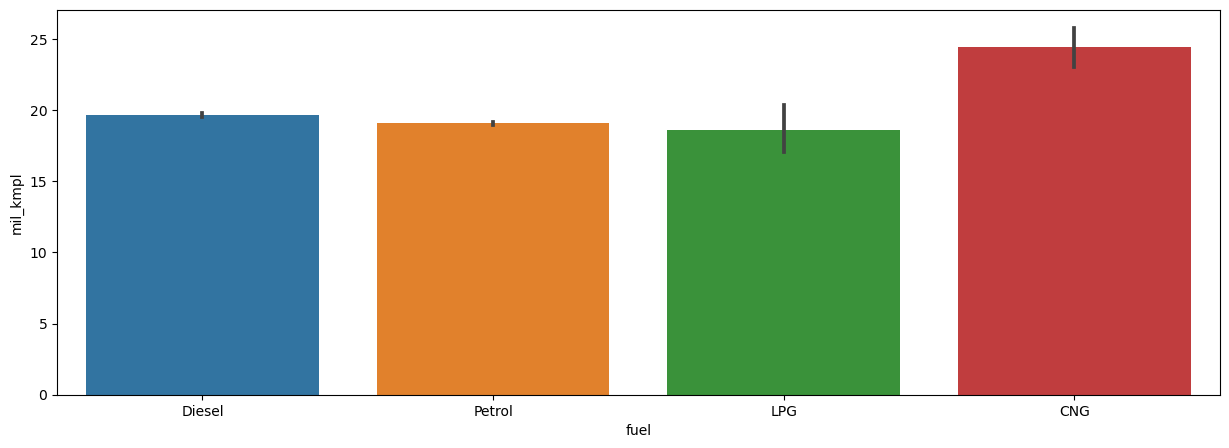

In [127]:
# Barplot
fig=plt.figure(figsize=(15,5))
sns.barplot(data = cars_new , x = "fuel" , y ='mil_kmpl')
plt.show()

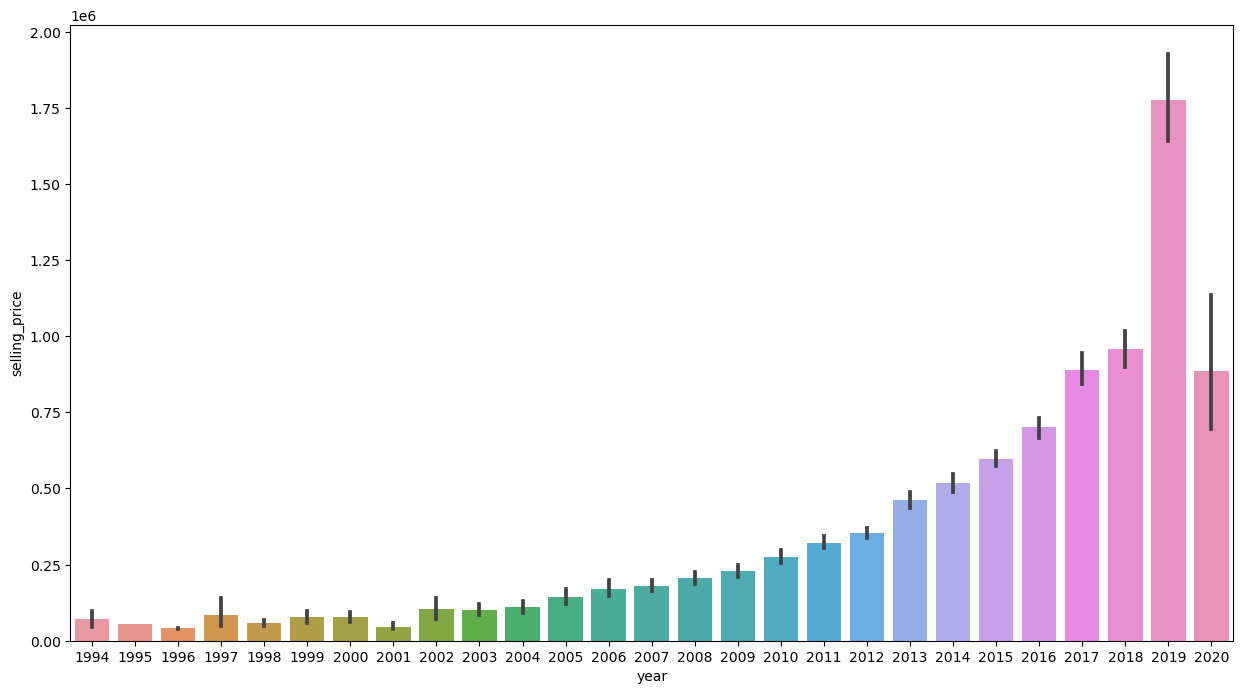

In [128]:
# Barplot
fig=plt.figure(figsize=(15,8))
sns.barplot(data = cars_new , x = "year" , y ='selling_price')
plt.show()

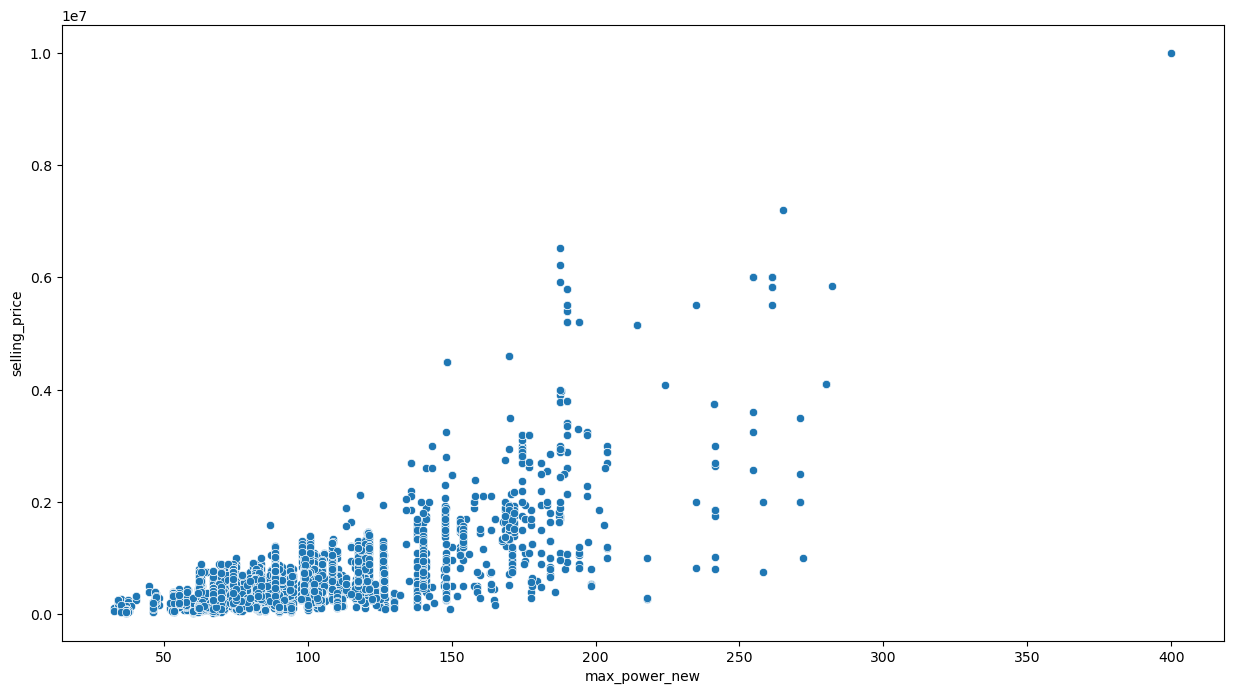

In [129]:
# scatterplot:
fig=plt.figure(figsize=(15,8))
sns.scatterplot(x = cars_new.max_power_new , y = cars_new.selling_price)
plt.show()

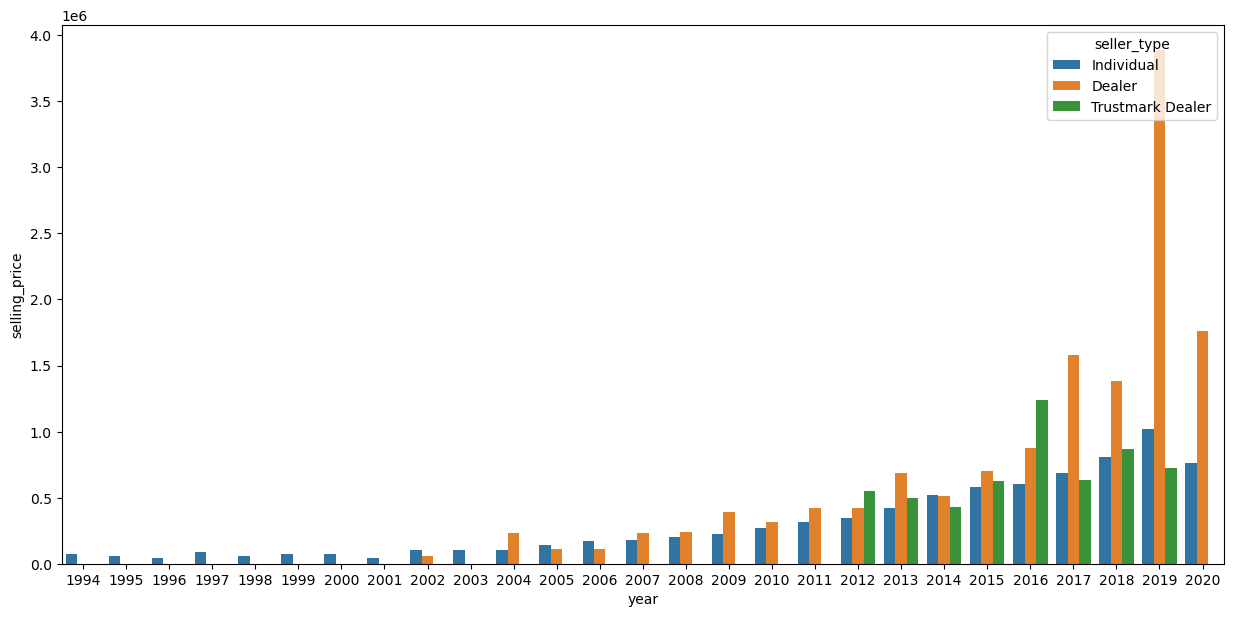

In [130]:
max_rev = cars_new.groupby(['year','seller_type'])['selling_price'].mean()
max_rev = pd.DataFrame(max_rev)
max_rev = max_rev.reset_index()

fig=plt.figure(figsize=(15,7))
sns.barplot(x = max_rev.year , y = max_rev.selling_price,hue= max_rev.seller_type)
plt.show()
#max_rev

### 1. We can see there is high correlation of selling price(which we will be predicting) with max_power output of the car
### 2. The values of correlation are pretty averaged out meaning we wont be excluding any column as each column is able to provide us with new
### 3.information that is not provided by any other column.

In [131]:
# Our journey for finding categorical data.
cars_new['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64

In [132]:
cars_new['seller_type'].value_counts()

seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [133]:
cars_new['transmission'].value_counts()

transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64

In [134]:
cars_new['owner'].value_counts()

owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

## Converting the Categorical Variables to Integer Format

In [135]:
def ref1(x):
  if x == 'Manual':
    return 1
  else:
    return 0

cars_new['transmission'] = cars_new['transmission'].map(ref1)

In [136]:
def ref2(x):
  if x == 'Individual':
    return 1
  elif x == 'Dealer':
    return 0
  else:
    return -1

cars_new['seller_type'] = cars_new['seller_type'].map(ref2)

In [137]:
def ref3(x):
  if x == 'Petrol':
    return 1
  elif x == 'Diesel':
    return 0
  else:
    return -1

cars_new['fuel'] = cars_new['fuel'].map(ref3)

In [138]:
owners = pd.get_dummies(cars_new['owner'])

## Splitting the Feature and Target Variables

In [139]:
X = pd.concat([cars_new, owners], axis=1)
y = X['selling_price'].values
X = X.drop(['selling_price', 'name', 'owner'], axis = 1).values

## Splitting the Dataset into Training and Test Dataset

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Building Different Machine Learning Models 

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Multiple Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test Set Results

In [143]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 568083.86  430000.  ]
 [1376443.2   779000.  ]
 [ 113205.95  200000.  ]
 ...
 [-207507.19  120000.  ]
 [ 213113.89  340000.  ]
 [ 181958.66  620000.  ]]


## Evaluating the Model Accuracy (R Square and Adjusted R Square)

In [144]:
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Calculating R-squared and adjusted R-squared
r_squared = r2_score(y_test, y_pred)
n = len(y_test)
k = X.shape[1]  
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(f"R-squared : {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

R-squared : 0.6701702979911344
Adjusted R-squared: 0.6670110096577161


# Polynomial Regression

## Training the Polynomial Regression Model on the Whole Dataset

In [145]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 4)
x_poly = pol_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

## Evaluating the Model Accuracy (R Square and Adjusted R Square)

In [146]:
y_pred = lin_reg_2.predict(x_poly)

lin_reg_2.score(x_poly, y)

from sklearn.metrics import r2_score
r_squared = r2_score(y, y_pred)

n = x_poly.shape[0]
p = x_poly.shape[1]

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

In [147]:
print(f"R Squared : {r_squared}")
print(f"Adjusted R Squared : {adjusted_r_squared}")

R Squared : 0.9304114316347798
Adjusted R Squared : 0.8634654671315299


# Support Vector Regression

## Training the SVR Model on the Whole Dataset

In [148]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

## Predicting the Test Set Results

In [149]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[450622.51 430000.  ]
 [450834.02 779000.  ]
 [449942.43 200000.  ]
 ...
 [449904.87 120000.  ]
 [449907.15 340000.  ]
 [449905.28 620000.  ]]


## Evaluating the Model Accuracy (R Square and Adjusted R Square)

In [150]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
n = len(y_test)
k = X.shape[1]  # Number of predictors excluding the intercept
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print(f"R-squared: {r_squared:.3f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.3f}")


R-squared: -0.063
Adjusted R-squared: -0.073


# Random Forest Regression

## Training the Random Forest Regression Model on the Whole Dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X,y)

## Predicting Results on the Test Set

In [152]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[450622.51 430000.  ]
 [450834.02 779000.  ]
 [449942.43 200000.  ]
 ...
 [449904.87 120000.  ]
 [449907.15 340000.  ]
 [449905.28 620000.  ]]


## Checking Accuracy on the Training Set

In [153]:
#Fit
random_model.fit(X_train, y_train)

y_pred = random_model.predict(X_test)

#Checking the accuracy
random_model_accuracy = round(random_model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy, 2), '%')

99.5 %


## Checking Accuracy on the Test Set

In [154]:
random_model_accuracy1 = round(random_model.score(X_test, y_test)*100,2)
print(round(random_model_accuracy1, 2), '%')

97.47 %


In [156]:
import pickle

# Assuming 'random_model' is your trained model
path = r"C:\Users\koushik\OneDrive\Desktop\ML Projects\Car Selling Price Prediction using Random Forest Regression\Code\CarSelling.pickle"
with open(path, 'wb') as file:
    pickle.dump(random_model, file)
